In [21]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]
df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [3]:
def fix_state_names(state_name):
    fix_these = {
        'México': 'Edo. de México',
        'San Luis Potosí': 'San luis Potosí',
        'Baja California': 'Baja California Norte'
    }
    
    return fix_these.get(state_name, state_name)

In [27]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

En la siguiente celda esta el filtrado, cambiar lo que se filtra y ver los demas casos

In [ ]:
mono = df[df["habitaciones"]==1]

In [23]:
mono['preciom2usd'] = mono['preciousd'] / mono['metrostotales']
mono.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,anio de publicacion,mes de publicacion,preciousd,preciom2usd
150,46540,magnífica suite a la venta sobre arquímedes (p...,atención inversionistas!! magnífico depto tipo...,Apartamento,ARQUÍMEDES,Miguel Hidalgo,Distrito Federal,5.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,3800000.0,2015,8,190000.0,3166.666667
192,123025,consultorio en venta en excelente ubicacion,"consultorios en condominio, excelente ubicació...",Oficina comercial,CALLE TARASCOS 3514,Zapopan,Jalisco,20.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,570000.0,2016,12,28500.0,1500.000000
195,225438,remate de un edificio gran oportuninad (pedro ...,ponemos a la venta derechos litigiosos de una ...,Casa,PEDRO,Gustavo A. Madero,Distrito Federal,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5150000.0,2015,1,257500.0,847.039474
224,199424,departamento en venta en cuauhtémoc,"-- rav8115e-105 -- excelente departamento, ...",Apartamento,RIO TIBER 22,Cuauhtémoc,Distrito Federal,60.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4250000.0,2015,11,212500.0,1700.000000
333,59355,autenticas casas progresivas residenciales,descripción: en terreno de 800 m2. están despl...,Casa,Carretera federal por Mayacoba,Solidaridad,Quintana Roo,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1840000.0,2016,6,92000.0,1057.471264


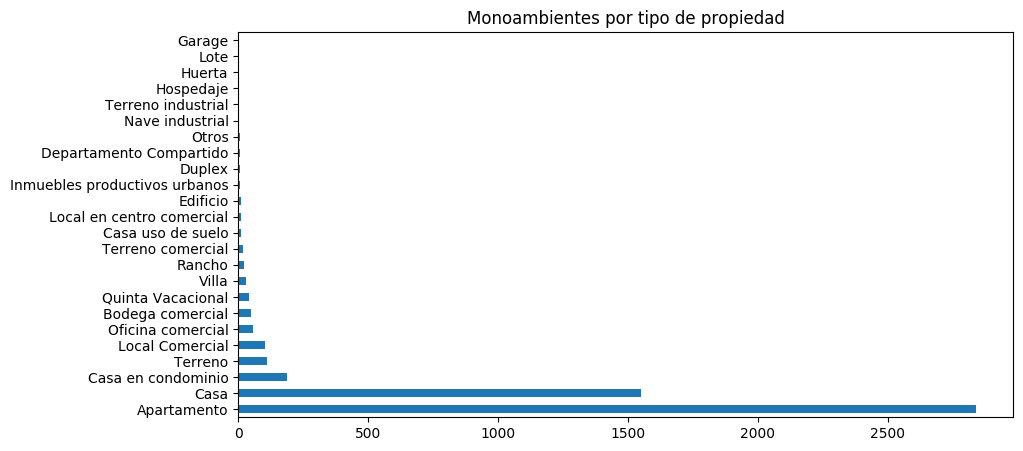

In [49]:
mono.tipodepropiedad.value_counts().plot(kind='barh', figsize=(10, 5), title="Monoambientes por tipo de propiedad")

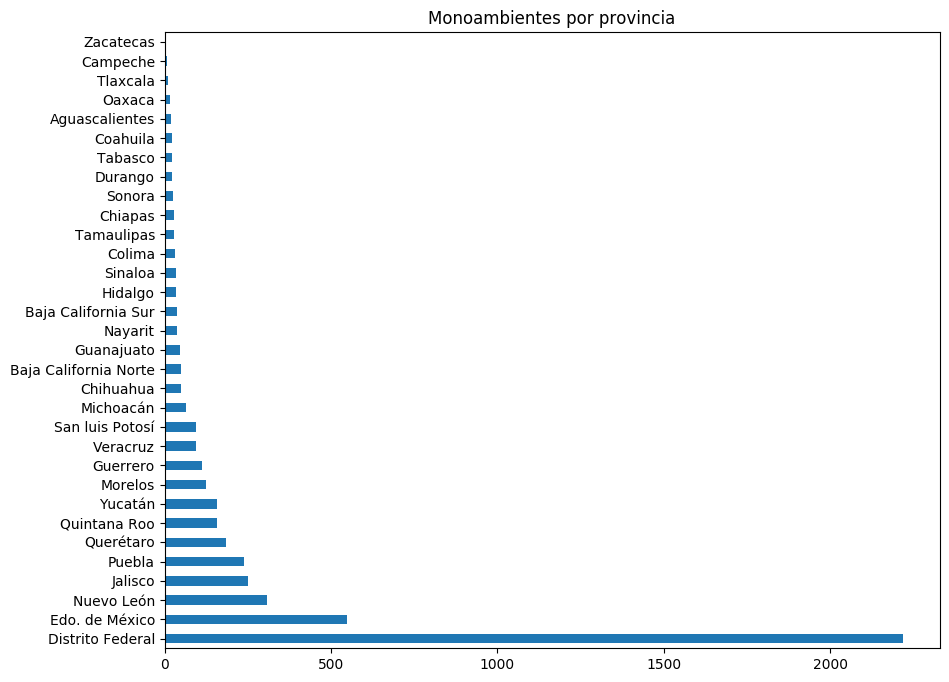

In [51]:
mono.provincia.value_counts().plot(kind='barh', figsize=(10, 8), title="Monoambientes por provincia")

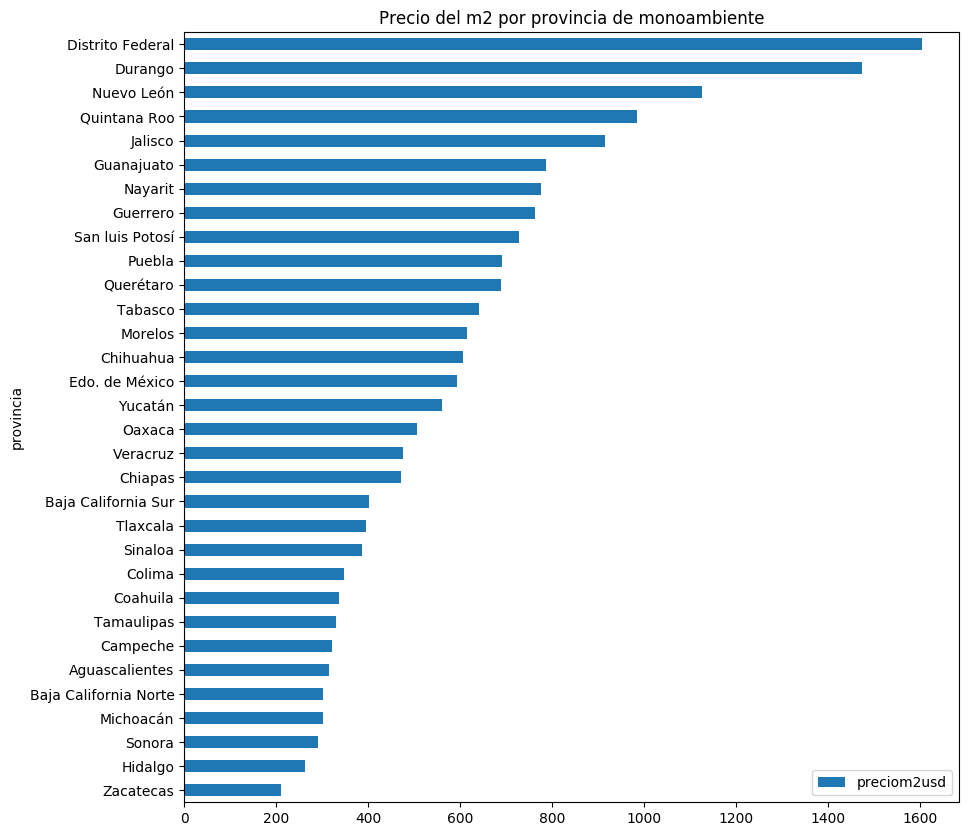

In [24]:
mono_m2_prov = mono.groupby("provincia").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd")
mono_m2_prov.plot(kind='barh', figsize=(10, 10),title="Precio del m2 por provincia de monoambiente")

Text(114.0, 0.5, 'Año de Publicacion')

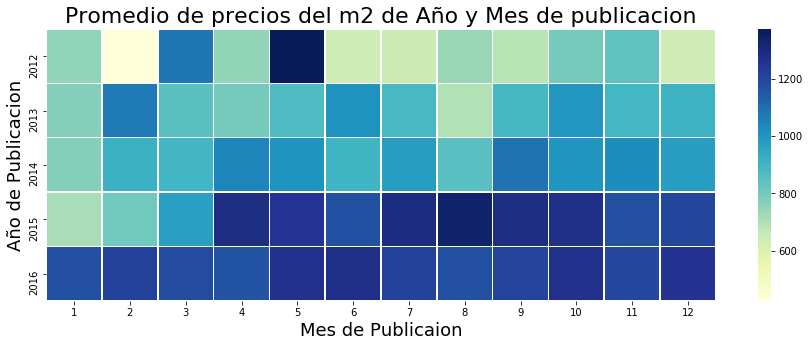

In [13]:
columnas = ["anio de publicacion","mes de publicacion","preciom2usd"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='preciom2usd', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Promedio de precios del m2 de Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

Text(114.0, 0.5, 'Año de Publicacion')

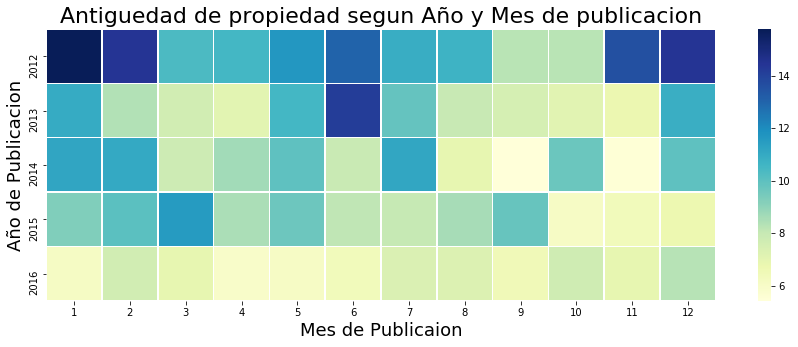

In [14]:
columnas = ["anio de publicacion","mes de publicacion","antiguedad"]
publicado = mono[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='antiguedad', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Antiguedad de propiedad segun Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicaion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

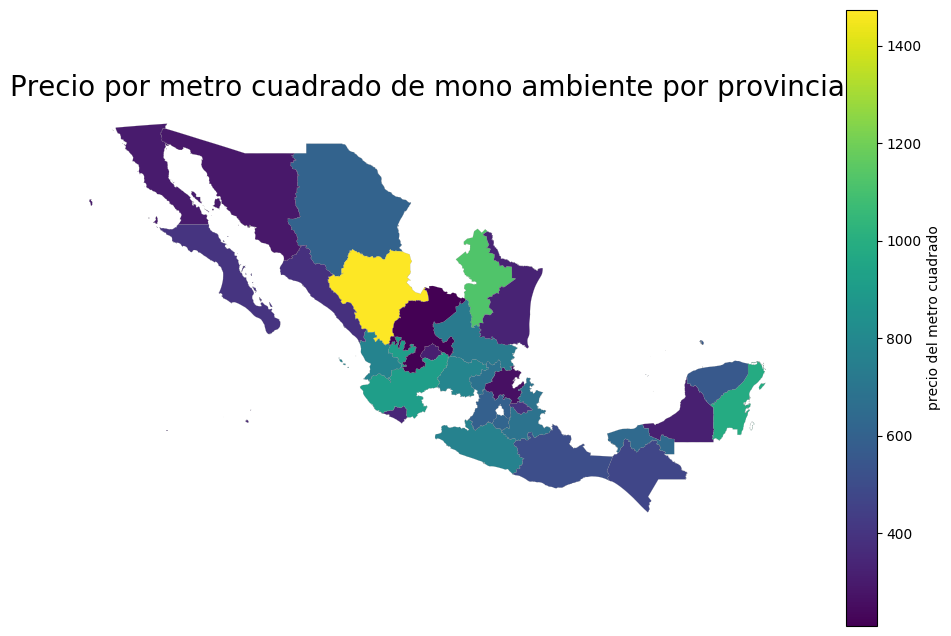

In [22]:
mexico = gpd.read_file('data/shapes/MEX_adm1.shp')

mexico = mexico.rename(columns={"Name":"NAME_1"})

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

mono_avg_preciom2 = mono.groupby('provincia').agg({'preciom2usd': 'mean'})\
                        .reset_index().rename(columns={'preciom2usd': 'avg preciom2usd'})\
                        .sort_values('avg preciom2usd', ascending=False)

mexico = pd.merge(left=mexico, right=mono_avg_preciom2, left_on='NAME_1', right_on='provincia')

vmin = mexico['avg preciom2usd'].min()
vmax = mexico['avg preciom2usd'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg preciom2usd', cmap='viridis', linewidth=0.1, edgecolor='0.5')

ax.set_title('Precio por metro cuadrado de mono ambiente por provincia', fontsize=20)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('precio del metro cuadrado');

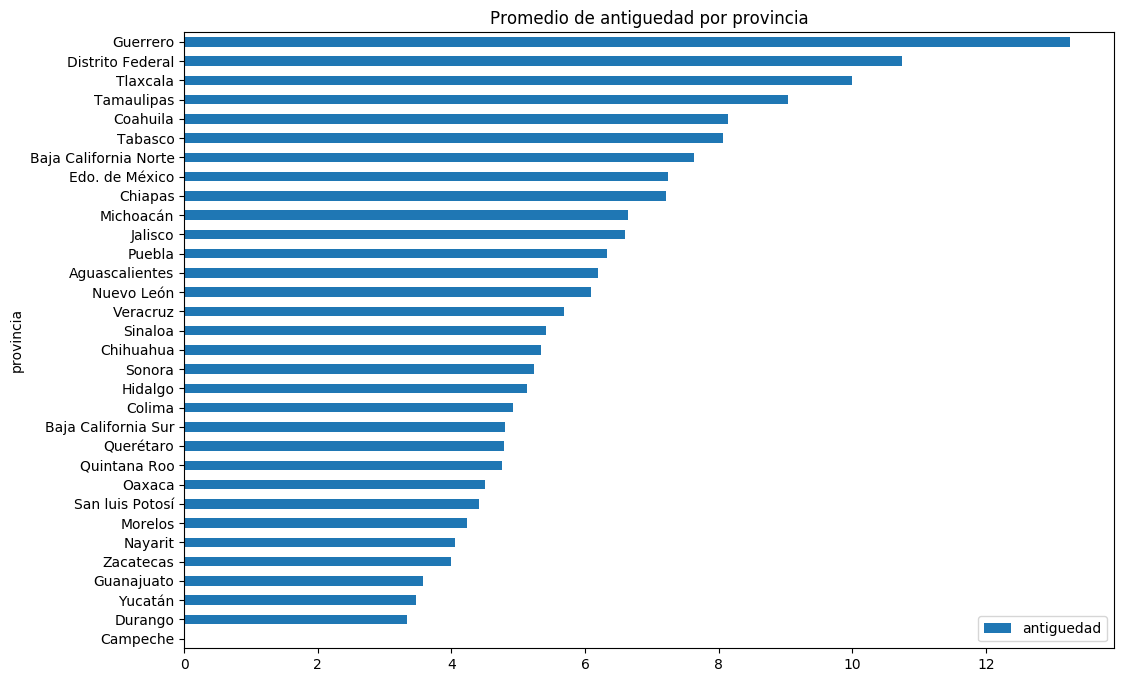

In [58]:
agrupado = mono.groupby("provincia").agg({"antiguedad":"mean"}).sort_values(by="antiguedad")
agrupado.plot(kind="barh",title="Promedio de antiguedad por provincia")

Las publicaciones de los monoambientes en campeche son propiedades a estrenar

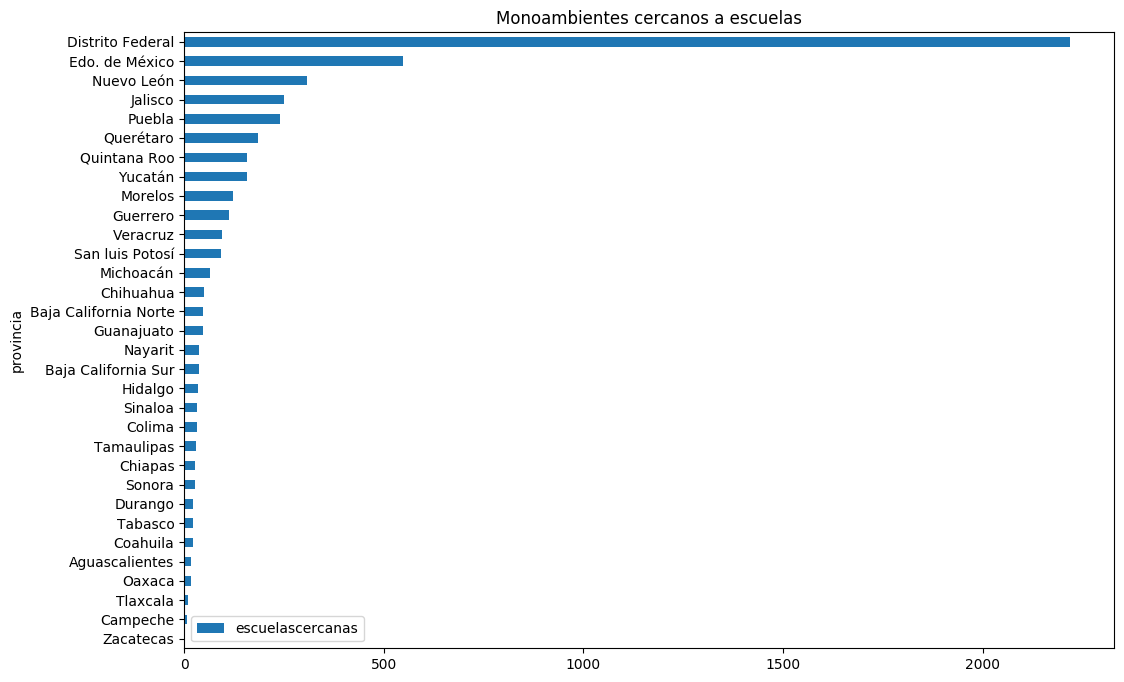

In [57]:
mono.groupby("provincia").agg({"escuelascercanas":"count"}).sort_values(by="escuelascercanas").plot(kind="barh",title="Monoambientes cercanos a escuelas")

Se puede ver que Distrito federal es la ciudad con mas escuelas cercanas. Por eso mismo tiene el m2 mas caro tambien ya que es la capital